In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

In [ ]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv', na_values='N/A')

In [ ]:
#For removing empty spaces
from pandas.api.types import is_string_dtype

for column in data.columns:
    if (is_string_dtype(data[column].dtype)):
        data[column] = data[column].str.strip()

In [ ]:
X = data.loc[:, data.columns != 'stroke']
y = data['stroke']

In [ ]:
print(X.shape, y.shape)

(5110, 11) (5110,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4088, 11) (1022, 11) (4088,) (1022,)


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
si_X_train = pd.DataFrame()
si_X_test = pd.DataFrame()

In [ ]:
for column in X_train.columns:
  if (is_string_dtype(X_train[column].dtype)):
    si = SimpleImputer(strategy='most_frequent')
  else:
    si = SimpleImputer(strategy='median')
  si.fit(X_train[[column]])
  si_X_train[column] = si.transform(X_train[[column]]).flatten()
  si_X_test[column] = si.transform(X_test[[column]]).flatten()

In [ ]:
si_X_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,28932.0,Female,36.0,0.0,0.0,Yes,Private,Rural,67.29,36.7,formerly smoked
1,37150.0,Female,34.0,0.0,0.0,Yes,Private,Rural,83.53,48.5,formerly smoked
2,71669.0,Male,60.0,0.0,0.0,Yes,Private,Rural,65.16,30.8,never smoked
3,27153.0,Female,75.0,0.0,0.0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked
4,58235.0,Male,76.0,0.0,0.0,Yes,Private,Urban,58.65,25.6,smokes
...,...,...,...,...,...,...,...,...,...,...,...
4083,30457.0,Female,53.0,1.0,0.0,Yes,Govt_job,Rural,98.61,38.8,smokes
4084,24836.0,Female,61.0,0.0,0.0,Yes,Private,Rural,72.01,26.0,formerly smoked
4085,17079.0,Male,44.0,0.0,0.0,Yes,Private,Rural,94.71,28.4,smokes
4086,72340.0,Male,21.0,0.0,0.0,No,Private,Urban,120.94,29.7,formerly smoked


In [ ]:
categorical_features = []
for col in data.columns:
  if col=='Class':
    continue
  if is_string_dtype(data[col].dtype):
    categorical_features.append(col)

In [ ]:
categorical_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
l_X_train = pd.DataFrame()
l_X_test = pd.DataFrame()

In [ ]:
#Convert the text features
for column in X_train.columns:
  if column in categorical_features:
    l_X_train[column] = le.fit_transform(si_X_train[column])
    l_X_test[column] = le.transform(si_X_test[column])
  else:
    l_X_train[column] = si_X_train[column].copy()
    l_X_test[column] = si_X_test[column].copy()

In [ ]:
l_X_train.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler(sampling_strategy=0.75)
l_X_train_ns,y_train_ns = os.fit_resample(l_X_train,y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 3893, 1: 195})
The number of classes after fit Counter({0: 3893, 1: 2919})


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

l_X_train_ns = ss.fit_transform(l_X_train_ns)
l_X_test = ss.transform(l_X_test)

In [ ]:
print(l_X_train)

           id  gender   age  hypertension  heart_disease  ever_married  \
0     28932.0       0  36.0           0.0            0.0             1   
1     37150.0       0  34.0           0.0            0.0             1   
2     71669.0       1  60.0           0.0            0.0             1   
3     27153.0       0  75.0           0.0            0.0             1   
4     58235.0       1  76.0           0.0            0.0             1   
...       ...     ...   ...           ...            ...           ...   
4083  30457.0       0  53.0           1.0            0.0             1   
4084  24836.0       0  61.0           0.0            0.0             1   
4085  17079.0       1  44.0           0.0            0.0             1   
4086  72340.0       1  21.0           0.0            0.0             0   
4087  52242.0       0  58.0           1.0            0.0             1   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  
0             2               0     

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

def evaluate_preds(y_test,y_pred):
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    mcc = matthews_corrcoef(y_test,y_pred)

    metric_dict = {
        "accuracy":round(accuracy,2),
        "precision":round(precision,2),
        "recall":round(recall,2),
        "f1":round(f1,2),
        "mcc": mcc
    }

    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    print(f'MCC Score: {mcc:.2f}')

    return metric_dict

In [ ]:
metrics = {}

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',random_state=0)
svc.fit(l_X_train_ns,y_train_ns)

SVC(random_state=0)

In [ ]:
y_pred = svc.predict(l_X_test)
metrics["svc"] = evaluate_preds(y_test, y_pred)

Acc: 81.70%
Precision: 0.15
Recall: 0.54
F1 score: 0.24
MCC Score: 0.21


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(l_X_train_ns,y_train_ns)

GaussianNB()

In [ ]:
y_pred = naive.predict(l_X_test)
metrics["naive"] = evaluate_preds(y_test, y_pred)

Acc: 78.38%
Precision: 0.16
Recall: 0.70
F1 score: 0.26
MCC Score: 0.26


In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(l_X_train_ns,y_train_ns)

LogisticRegression()

In [ ]:
y_pred = logistic.predict(l_X_test)
metrics["logistic"] = evaluate_preds(y_test, y_pred)

Acc: 80.04%
Precision: 0.16
Recall: 0.65
F1 score: 0.26
MCC Score: 0.25


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=40)
neigh.fit(l_X_train_ns,y_train_ns)

KNeighborsClassifier(n_neighbors=40)

In [ ]:
y_pred = neigh.predict(l_X_test)
metrics["knn"] = evaluate_preds(y_test, y_pred)

Acc: 76.42%
Precision: 0.13
Recall: 0.63
F1 score: 0.22
MCC Score: 0.21


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, n_jobs=-1, criterion='entropy')
rf.fit(l_X_train_ns,y_train_ns)

RandomForestClassifier(criterion='entropy', n_estimators=500, n_jobs=-1)

In [ ]:
y_pred = rf.predict(l_X_test)
metrics["rfc"] = evaluate_preds(y_test, y_pred)
predicted_class = "Stroke" if y_pred[0] == 1 else "No Stroke"

# Print the prediction
print("Predicted class for the input sample:", predicted_class)

Acc: 94.81%
Precision: 1.00
Recall: 0.02
F1 score: 0.04
MCC Score: 0.13
Predicted class for the input sample: No Stroke


In [ ]:
import pandas as pd

df_metrics = pd.DataFrame(metrics).transpose()
df_metrics.index.name = "Algorithm"

print(df_metrics.to_string())

           accuracy  precision  recall    f1       mcc
Algorithm                                             
svc            0.82       0.15    0.54  0.24  0.212151
naive          0.78       0.16    0.70  0.26  0.258502
logistic       0.80       0.16    0.65  0.26  0.248761
knn            0.76       0.13    0.63  0.22  0.207473
rfc            0.95       1.00    0.02  0.04  0.132504


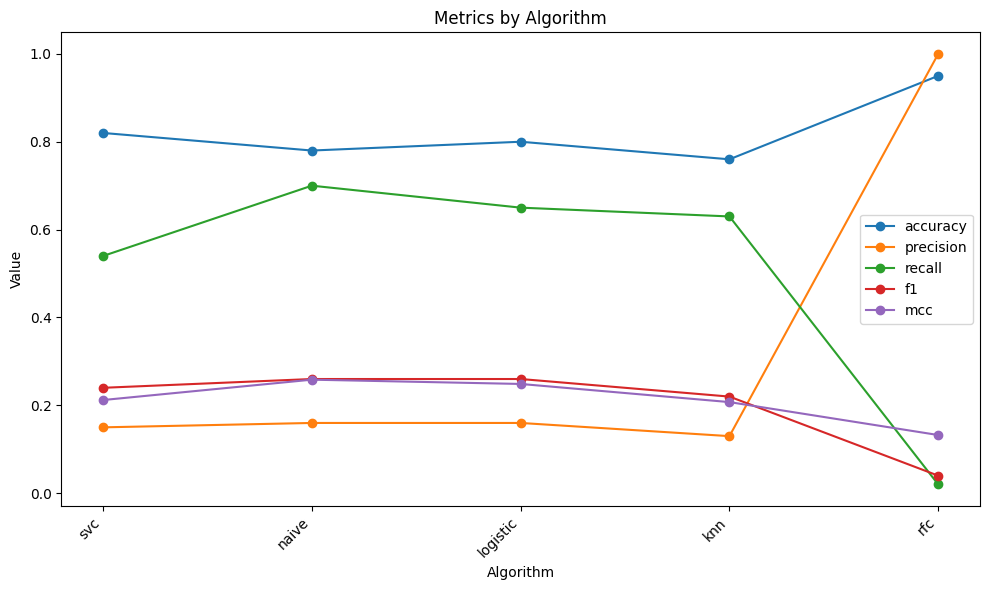

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Your DataFrame with metrics
df_metrics = pd.DataFrame(metrics).transpose()
df_metrics.index.name = "Algorithm"

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric
for metric in df_metrics.columns:
    ax.plot(df_metrics.index, df_metrics[metric], marker='o', label=metric)

# Set labels and title
ax.set_xlabel("Algorithm")
ax.set_ylabel("Value")
ax.set_title("Metrics by Algorithm")
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = [
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
]

random_cv = RandomizedSearchCV(estimator = svc,
                           param_distributions = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=2,
                           n_jobs = -1,
                           refit=True)

random_cv.fit(l_X_train_ns, y_train_ns)

best_accuracy = random_cv.best_score_
best_parameters = random_cv.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Accuracy: 97.86 %
Best Parameters: {'kernel': 'rbf', 'gamma': 0.9, 'C': 0.75}


In [ ]:
parameters = [
              {'n_estimators': range(10,300,10), 'criterion': ['gini', 'entropy'], 'max_features':['auto','sqrt','log2']}
]


random_cv = RandomizedSearchCV(estimator = rf,
                           param_distributions = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=2,
                           n_jobs = -1,
                           refit=True)


random_cv.fit(l_X_train_ns, y_train_ns)


best_accuracy = random_cv.best_score_
best_parameters = random_cv.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Accuracy: 99.44 %
Best Parameters: {'n_estimators': 210, 'max_features': 'log2', 'criterion': 'gini'}


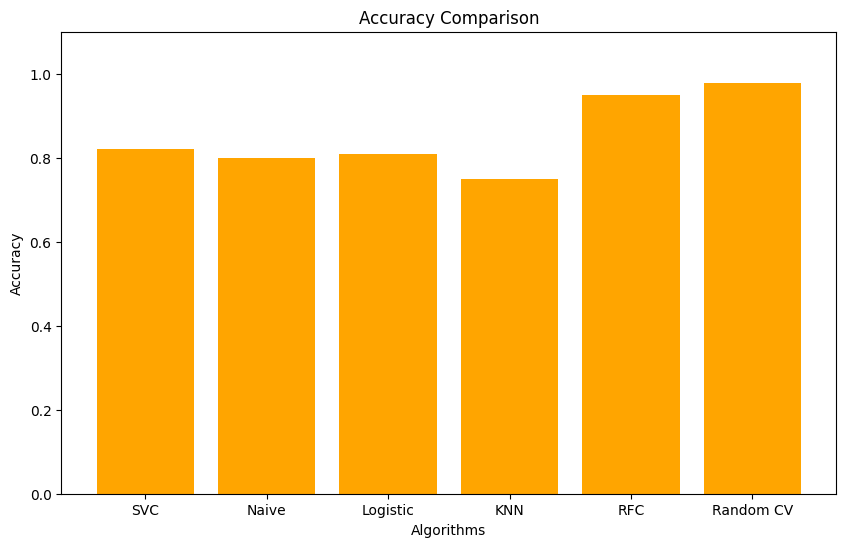

In [ ]:
import matplotlib.pyplot as plt

# Define accuracy values for different algorithms
accuracy_values = [0.82, 0.80, 0.81, 0.75, 0.95, 0.9781]  # Accuracy values for different algorithms, including random_cv
algorithms = ['SVC', 'Naive', 'Logistic', 'KNN', 'RFC', 'Random CV']  # Algorithm names, including random_cv

# Plot accuracy values
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracy_values, color='orange')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1.1)
plt.show()


In [ ]:
# Visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Computational libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv', na_values='N/A')

In [ ]:
import plotly.express as ex

fig = ex.pie(data,names='stroke')
fig.update_layout(title='<b>Proportion Of Stroke Samples<b>')
fig.show()

In [ ]:
sns.set_theme(style="darkgrid")

<Axes: >

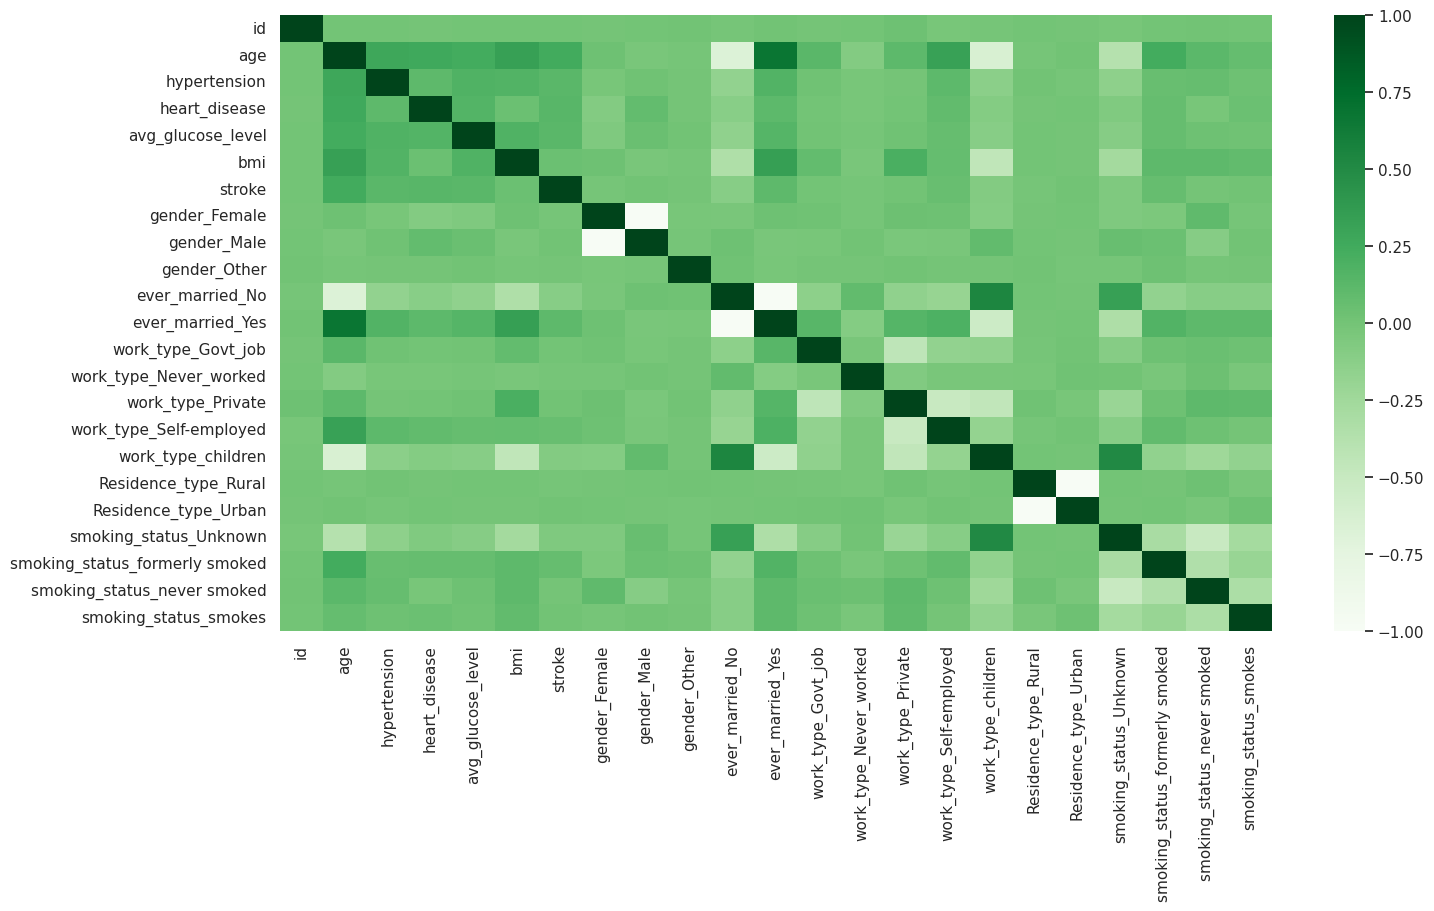

In [ ]:
plt.figure(figsize=(16,8))
encoded_data = pd.get_dummies(data)
sns.heatmap(encoded_data.corr(), cmap="Greens")

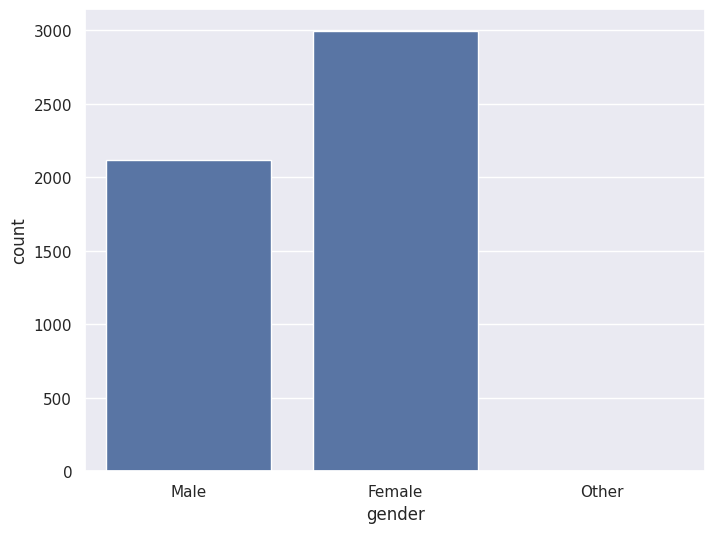

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.countplot(data=data, x="gender")
plt.show()

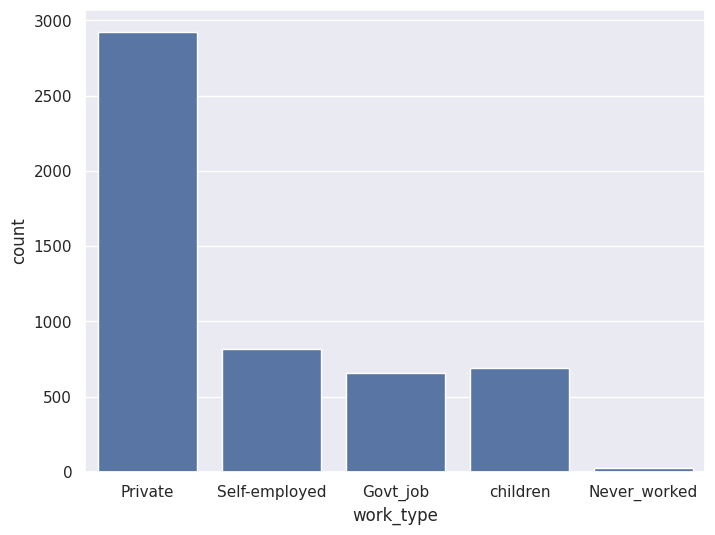

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.countplot(data=data, x="work_type")
plt.show()

In [ ]:
fig = ex.pie(data,names='smoking_status')
fig.update_layout(title='<b>Proportion Of Different Smoking Categories Among Stroke Population<b>')
fig.show()

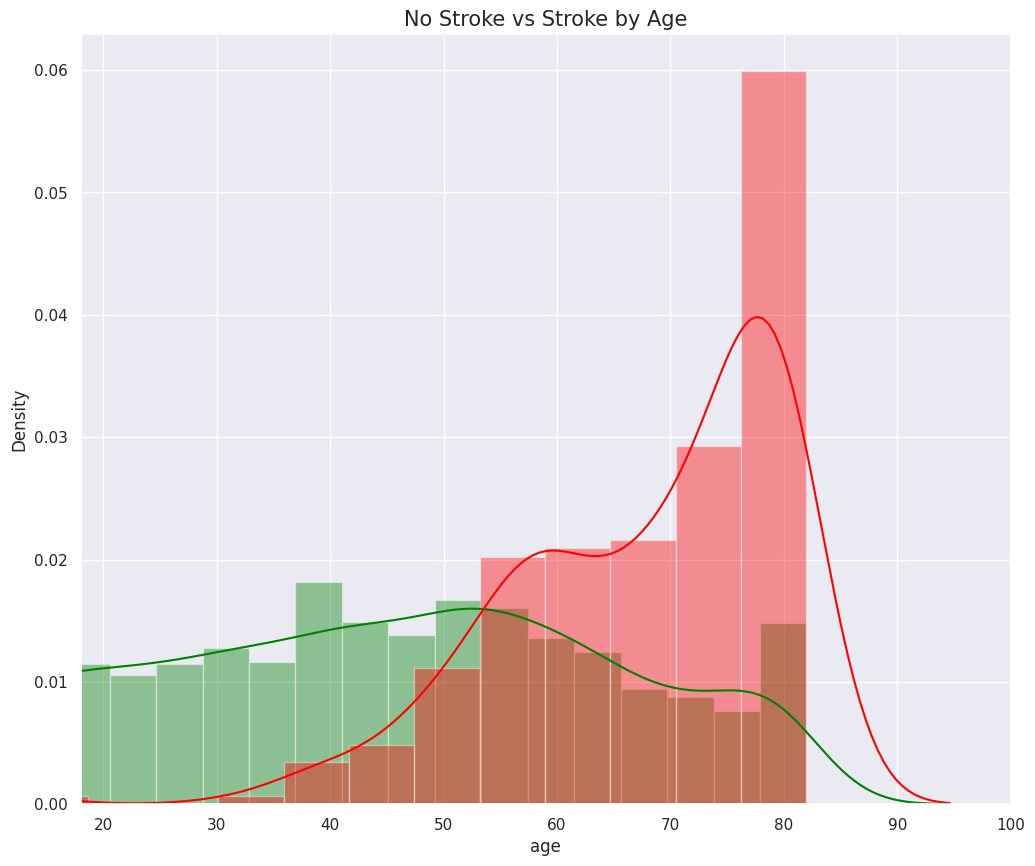

In [ ]:
plt.figure(figsize=(12, 10))

sns.distplot(data[data['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

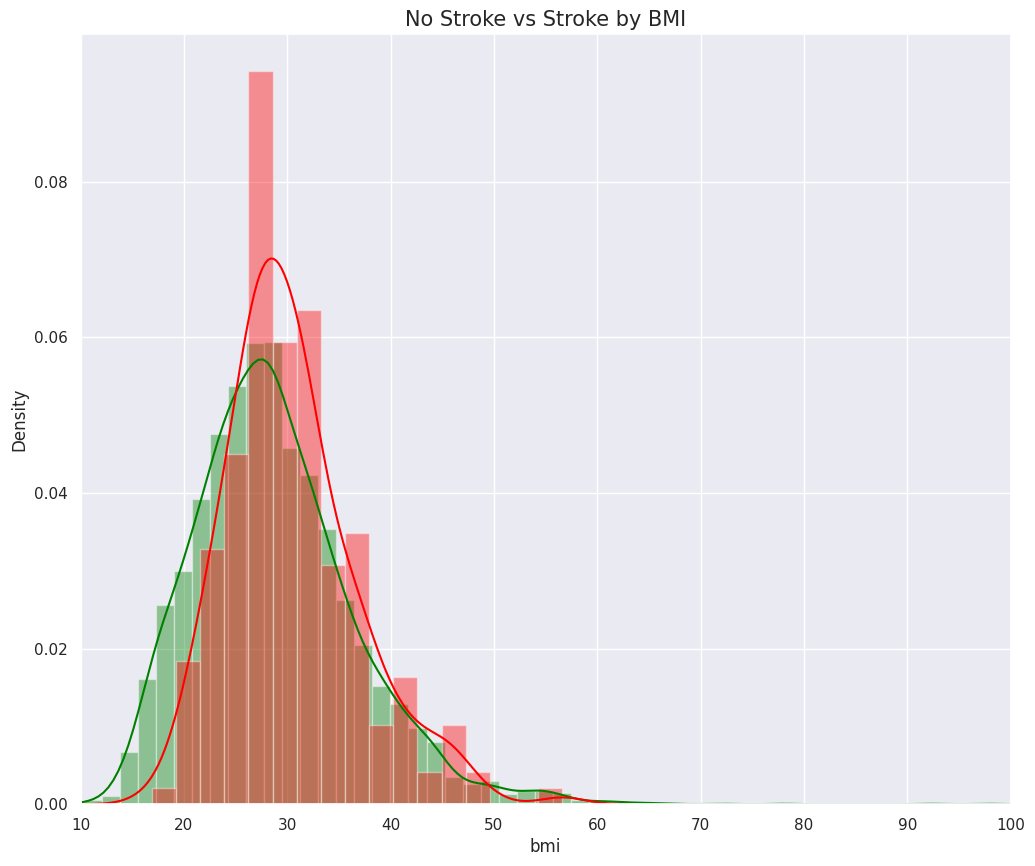

In [ ]:
plt.figure(figsize=(12,10))

sns.distplot(data[data['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

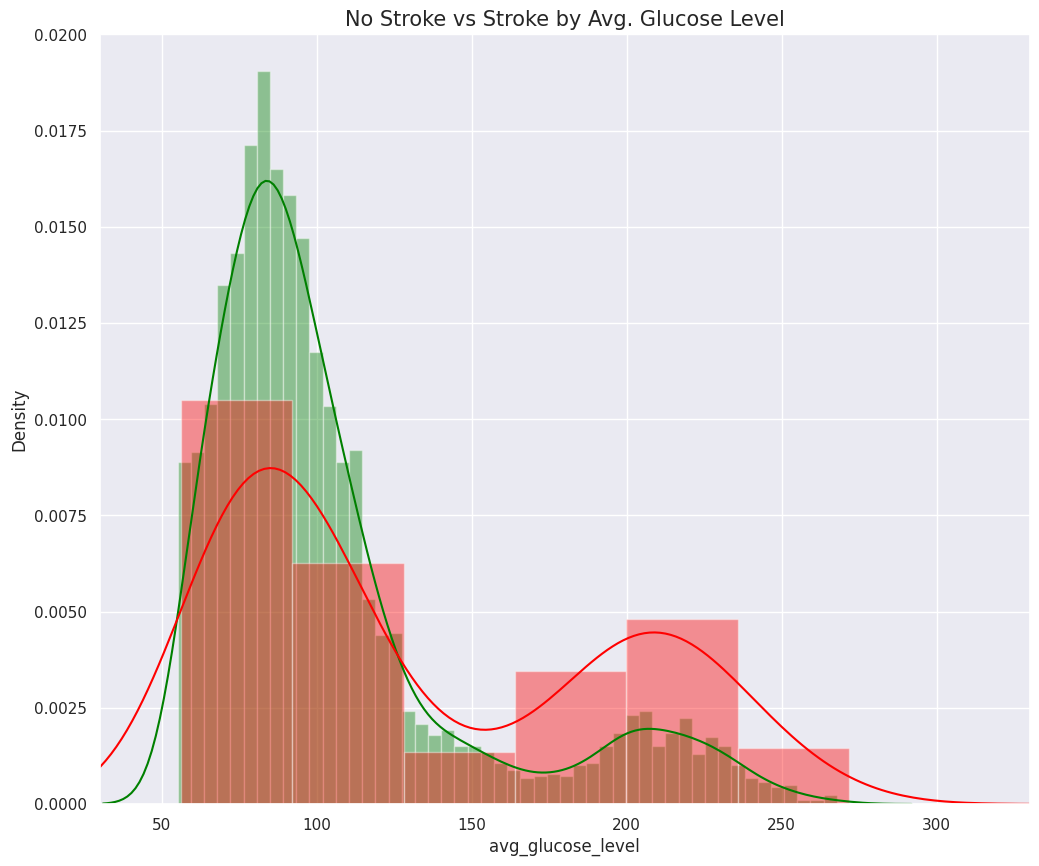

In [ ]:
plt.figure(figsize=(12,10))

sns.distplot(data[data['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(data[data['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

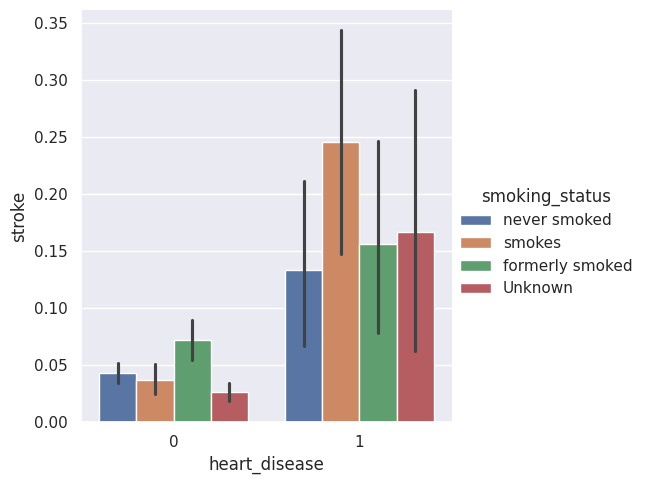

In [ ]:
sns.catplot(x="heart_disease", y="stroke", hue='smoking_status', kind="bar", data=data);